In [1]:
import sys
sys.path.append('../scripts')
from ML_pipline_functions import *



In [2]:
warnings.filterwarnings("ignore")

In [3]:

# File paths
train_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/train.csv'
test_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/test.csv'
store_path = 'C:/Users/Administrator/Desktop/Week 4/Technical Content/Data/store.csv'


# Load and clean data
train, test = load_data(train_path, test_path, store_path)
train_cleaned, test_cleaned = clean_data(train, test)

In [4]:
print("Train columns:", train_cleaned.columns)
print("Test columns:", test_cleaned.columns)

Train columns: Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')
Test columns: Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month',
       'Day'],
      dtype='object')


### Preprocessing data

In [5]:
# Prepare training and validation datasets
train_df = train_cleaned[train_cleaned.Date.dt.year <= 2014]
val_df = train_cleaned[train_cleaned.Date.dt.year == 2015]

input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Promo2', 'Day', 'Month', 'Year']
target_col = 'Sales'

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_cleaned[input_cols].copy()

num_cols = ['Store', 'DayOfWeek', 'Day', 'Month', 'Year']
cat_cols = ['DayOfWeek', 'Promo', 'StoreType', 'Assortment', 'Promo2']

train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
236380,1,3,2014-12-31,2605,327,1,0,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2014,12,31
236381,2,3,2014-12-31,2269,252,1,0,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,12,31
236382,3,3,2014-12-31,3804,408,1,0,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,12,31
236383,4,3,2014-12-31,10152,1311,1,0,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2014,12,31
236384,5,3,2014-12-31,1830,217,1,0,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2014,12,31


In [6]:
val_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


### using Sklearn Pipeline

In [7]:
# Create pipeline
pipeline = create_pipeline(input_cols, num_cols, cat_cols)

### Model Fitting

In [8]:
# Fit and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1)
}

for name, model in models.items():
    print(f"Evaluating model: {name}")
    train_inputs_transformed = pipeline.fit_transform(train_inputs)
    val_inputs_transformed = pipeline.transform(val_inputs)
    try_model(model, train_inputs_transformed, train_targets, val_inputs_transformed, val_targets)



Evaluating model: Linear Regression
Train RMSE: 2757.27346632773
Val RMSE: 2669.259558282088
Train RMSPE: 0.5452480223057078
Val RMSPE: 0.4860840775432122
Evaluating model: Decision Tree
Train RMSE: 0.0
Val RMSE: 1395.424142469505
Train RMSPE: 0.0
Val RMSPE: 0.21623589672660085
Evaluating model: Random Forest
Train RMSE: 406.97591681710804
Val RMSE: 1142.9126381766223
Train RMSPE: 0.094910802302245
Val RMSPE: 0.17983194076703538


### Prediction using test set

In [9]:
# Predict on test set
test_inputs_transformed = pipeline.transform(test_inputs)
test_preds = models["Random Forest"].predict(test_inputs_transformed)

# Add Store identifier from the test dataset
test_preds_df_with_store = pd.DataFrame({
    'Store': test_inputs['Store'],  
    'Predicted Sales': test_preds
})

# Print the first few rows with store information and predictions
print(test_preds_df_with_store.head())

   Store  Predicted Sales
0      1          4289.03
1      3          7740.33
2      7          8757.85
3      8          6878.76
4      9          6566.67


### Post Prediction Analysis

In [10]:
# Get feature names from the pipeline's transformer
onehot_columns = list(pipeline.named_steps['preprocessor'].transformers_[1][1]\
                      .named_steps['onehot'].get_feature_names_out(cat_cols))
num_columns = num_cols  # These remain unchanged

# Print the one-hot encoded feature names and numeric feature names
print("One-Hot Encoded Feature Names:")
print(onehot_columns)
print("\nNumerical Feature Names:")
print(num_columns)


One-Hot Encoded Feature Names:
['DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'Promo2_0', 'Promo2_1']

Numerical Feature Names:
['Store', 'DayOfWeek', 'Day', 'Month', 'Year']


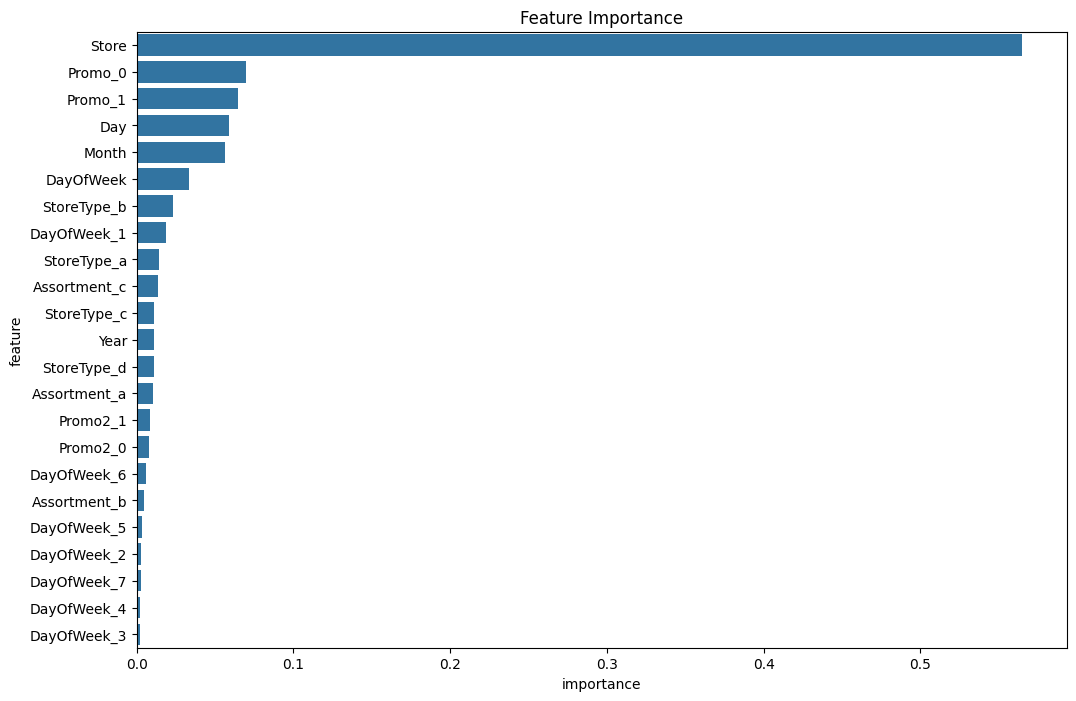

In [11]:
# Combine the columns from numeric and one-hot encoded features
all_columns = num_columns + onehot_columns
# Feature importance
feature_importance_df = pd.DataFrame({
    'feature': all_columns,  # Use the updated feature names
    'importance': models["Random Forest"].feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()


### Serialize Model

In [12]:
# Fit and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_jobs=-1)
}

for name, model in models.items():
    print(f"Evaluating model: {name}")
    train_inputs_transformed = pipeline.fit_transform(train_inputs)
    val_inputs_transformed = pipeline.transform(val_inputs)
    try_model(model, train_inputs_transformed, train_targets, val_inputs_transformed, val_targets)


    # Serialize the model
    timestamp = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    model_filename = f"{name.replace(' ', '_')}_{timestamp}.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as: {model_filename}")


Evaluating model: Linear Regression
Train RMSE: 2757.27346632773
Val RMSE: 2669.259558282088
Train RMSPE: 0.5452480223057078
Val RMSPE: 0.4860840775432122
Model saved as: Linear_Regression_24-09-2024-18-44-35.pkl
Evaluating model: Decision Tree
Train RMSE: 0.0
Val RMSE: 1395.424142469505
Train RMSPE: 0.0
Val RMSPE: 0.21623589672660085
Model saved as: Decision_Tree_24-09-2024-18-44-52.pkl
Evaluating model: Random Forest
Train RMSE: 406.97591681710804
Val RMSE: 1142.9126381766223
Train RMSPE: 0.094910802302245
Val RMSPE: 0.17983194076703538
Model saved as: Random_Forest_24-09-2024-18-48-55.pkl
